## Assignment 3: Revisions

__Start date: 05/11__

__Due date: Final Exam__

This last assignment serves as a summary on the material that was covered during the semester. The assignment is on 20 (regular) +4 (bonus) points. 
Don't forget to bring the notebook with you the day of the final.

### [10pts] Supervised learning: Revisions 

#### 3.1.1 [5pts] Supervised learning, Regression

In this first exercise, we will solve a simple regression problem by relying on the _Universal approximation Theorem_ and using a _one hidden neural network_ from Keras

__a) Start by generating and plotting the following function__

$$f(x) = 0.1 x^6 - 2 x^5 + 8 (\sin(x))^3 - 5 x^2+ 3 x + 1$$

for all values between $0$ and $1$.  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# put your code here

__b) Add a random Gaussian noise to the model. I.e add a small perturbation to p(x) with mean 0 and std .1.__ Then plot the resulting points with scatter

In [64]:
# put your code here



__c) Split your sample__ into two parts using the train_test split function from scikit-learn, take a 10% test set 

In [73]:
from sklearn.model_selection import train_test_split

# put your code here 



__d) Build a one hidden neural network with Keras__

Now that you have generated the data and split it between a train and 

We want the Keras model to be __Sequential__, to take a __scalar input__ (dimension=1, the '$x$' of your function $f(x)$), to have 40 neurons in a single hidden layer and have Relu activation functions. There should be a single output (the $y=f(x)$)

(in other words you should have no more then two call to the 'add' function of your model)

 - We will use a stochastic gradient descent algorithm (sgd) to train the model with a  learning rate of lr = $0.05$. define this algorithm using a call to 'optimizers'

- Define the training parameters by calling the function 'compile' of your model. Set the loss to 'mean_squared_error' and the optimizer to be the sgd algorithm which you defined earlier.

- Train your model on the X_train, y_train data using 'validation_split=0.2' as well as a batch of 1 sample, 100 or more epochs. To spare space, it is recommended to set verbose to 0.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

# put your code here

__e) apply you model to the test set and compute the RMS__ for the relative error following the formula

$$\sqrt{\sum_i \left(\frac{\text{prediction}[i] - y_{\text{test}}[i]}{y_{\text{test}}[i]}\right)^2} $$

(don't forget to remove possible zero values from $y_{\text{test}}$)

In [ ]:
# put your code here



__f)__ Finally, generate 100 points between 0 and 1 and apply your model to those values. Then plot the predicted regression function using plt.plot, in red, on top of the noisy samples that you generated in __(b)__

In [ ]:
# put your code here



The desired result is shown below

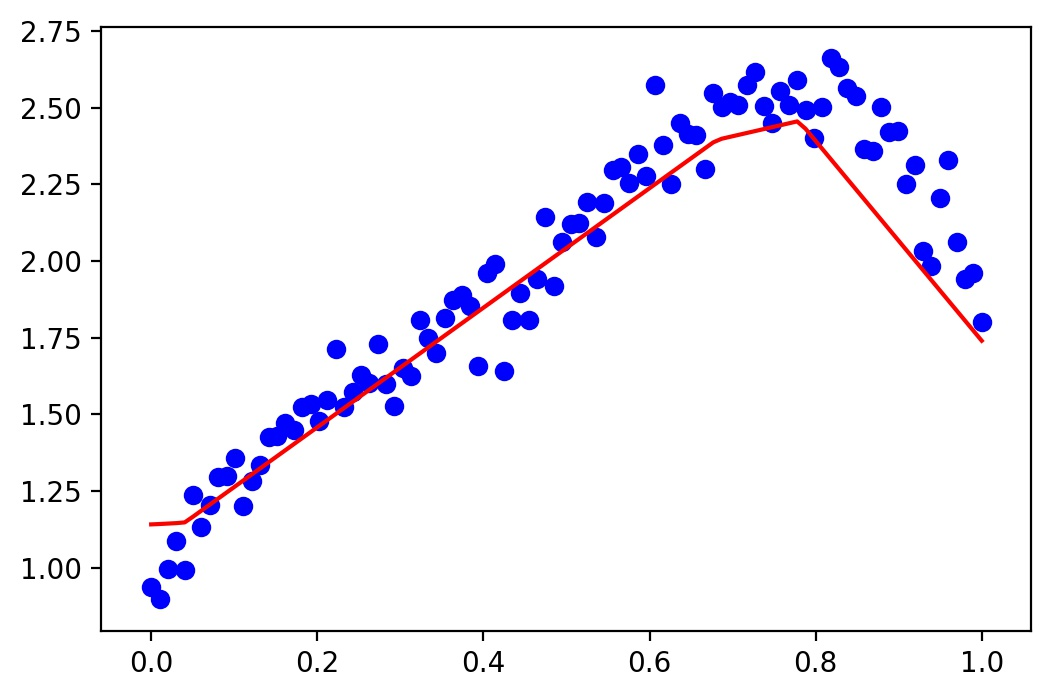

In [1]:
from IPython.display import Image
Image("desiredResult1.jpg", width=400, height=400)

#### 3.1.2 [5pts] Supervised Learning: Classification

Consider the classification dataset below. 

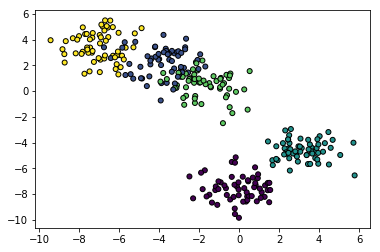

In [109]:
# import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

X1, Y1 = make_blobs(n_samples=300, n_features=2, centers=5, cluster_std=1.0)
                    
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
plt.show()

__(a) Split the dataset into a training and a test part__ 




In [ ]:
# put your code here



Then __(b) learn a Support Vector classifier using the built in functions from scikit-learn, 
test your classifier using the test_data and display the score__ 
$$\text{err} = \frac{\text{num correctly classified test points}}{\text{Total test size}}$$

### 3.2. [10pts] Unsupervised Learning

In this second part, we will K-means to delineate a tumor in a MR image. Then will combine K-means with PCA to learn hidden clusters from a high dimension dataset.

#### 3.2.1. [6pts] Unsupervised Learning: K means for tumor segmentation (5pts)

In this exercise, you will use _Kmeans_ to segment a Brain tumor. Consider the MR image shown below. In this image, a tumor has be manually delineated by a surgeon. Such a procedure is time consumming and to gain time we would like to automate it.

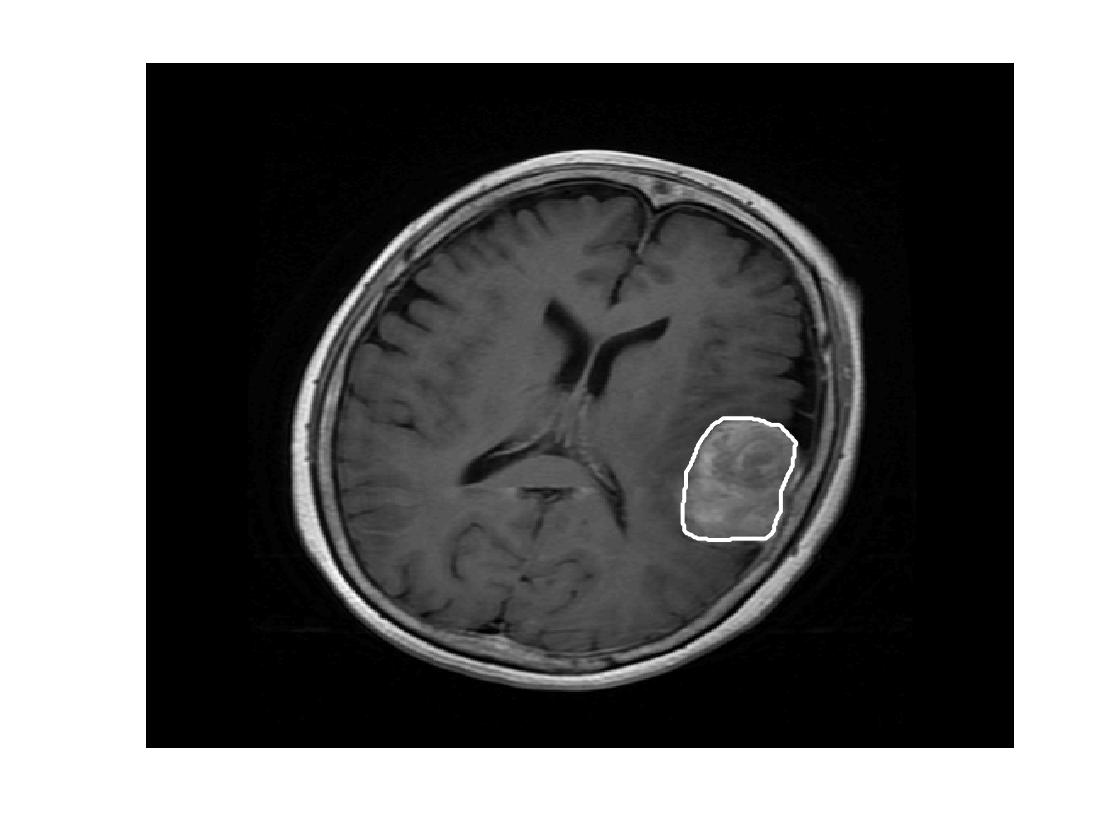

In [7]:
from IPython.display import Image
Image("brainTumor1.jpg", width=600, height=600)

Final objective:

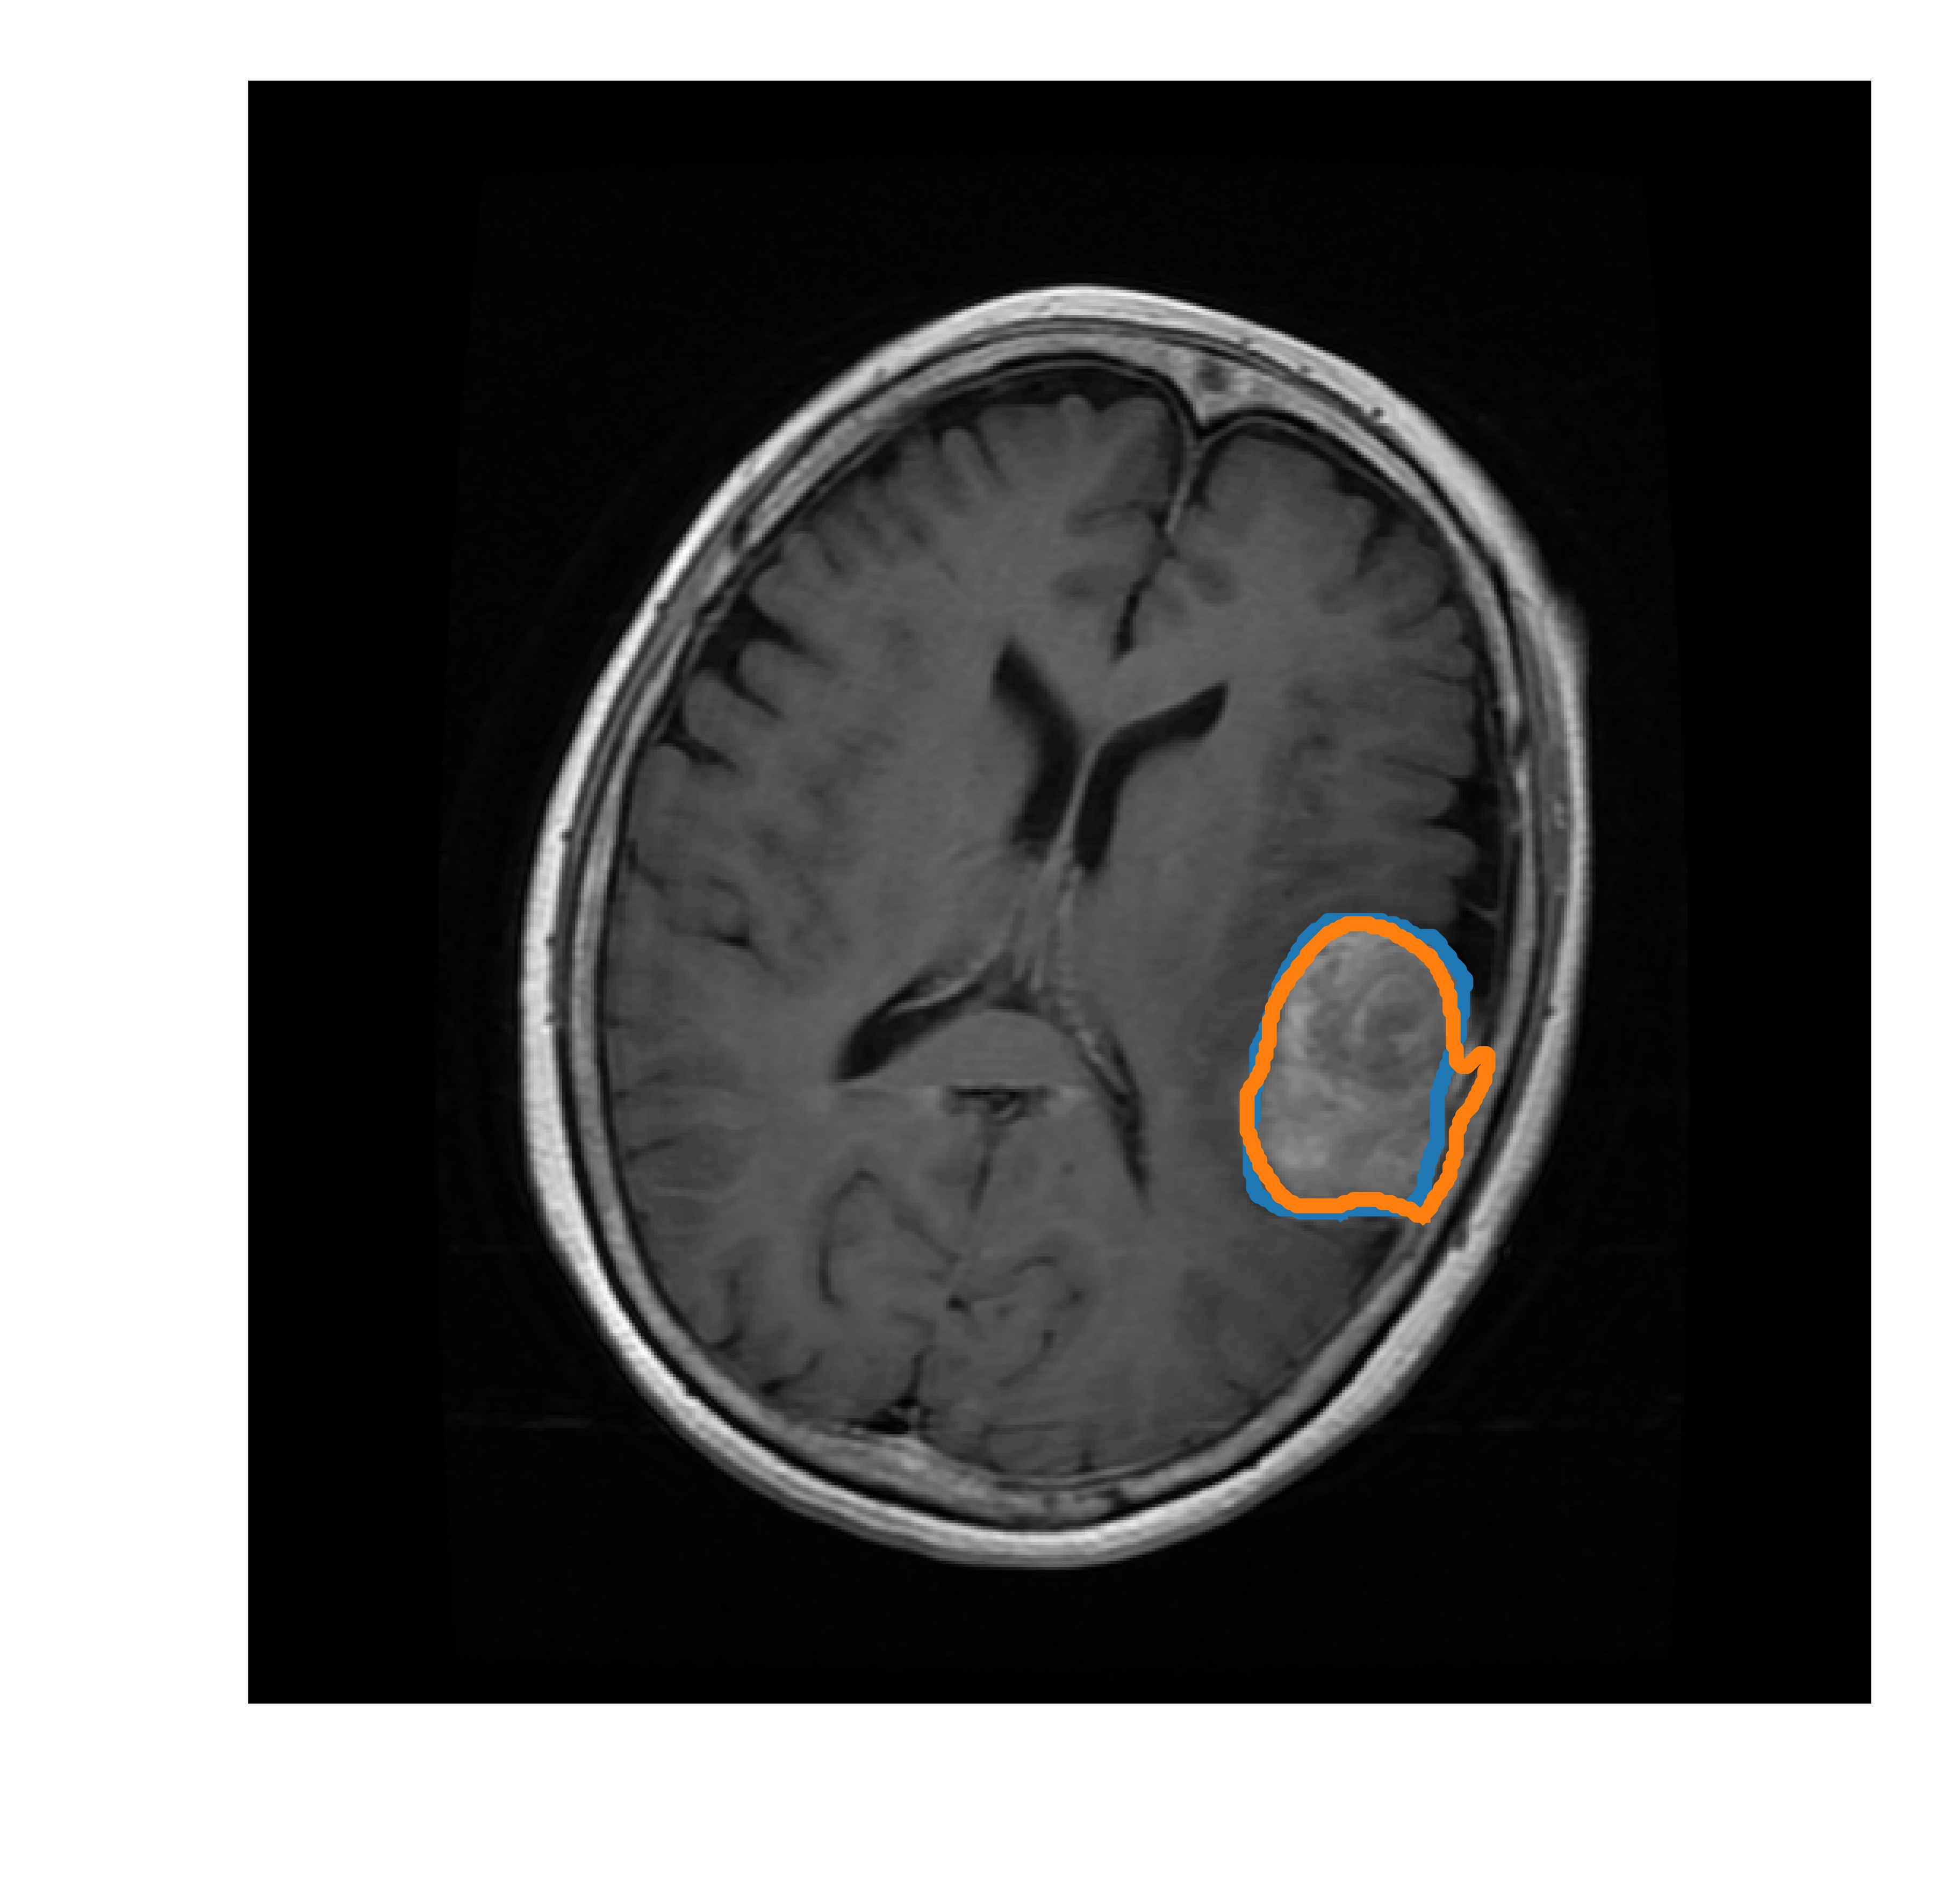

In [2]:
from IPython.display import Image
Image("TumorSegmentationComp.jpg", width=500, height=500)

The original image is given below together with the binary mask provided by the physician. 

We will use K-means to segment the image based on the pixels intensity and position. The snippet below is essentially there to preprocess the image (smooth it) and define the initial centroid to help you with the Kmeans segmentaton. 


__(a)__For each pixel in the image, define the corresponding feature vector as a 3-tuple containing the pixel intensity, and the x-y position (multiplied by a reweighting factor $1000$) in the image assuming that the limits of the image are [0,1]. One possible way to define the (x,y) position of each pixel is thus to use x1 = linspace(0,1,m) and y1 = linspace(0,1,n) where m and n are the size parameters of your image and to associate the coordinates (x1(i),y1(j)) to be the coordinates of pixel (i,j).


Once you have define the feature vectors for your list of pixels, use 'cluster.KMeans' from scikit-learn to initialize a Kmeans classifier with __6 clusters__ and initial centroids given by c1 to c6 below (encoded as $1x3$ feature vectors). Fit your model to the set of feature vectors and get the labels of each pixel using 'k_means.labels_'


In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from sklearn import cluster


mat_image = scipy.io.loadmat('MRimageRaw.mat') # The image is stored in mat_image['X1']
mat_mask = scipy.io.loadmat('MRimageMask.mat') # The mask is stored in mat_mask['X2']

X1 = mat_image['X1']
X = X1
ss1 = X1.shape

centroid1 = np.zeros(X1.shape)
centroid1[100,100]=1
centroid2 = np.zeros(X1.shape)
centroid2[300,340]=1
centroid3 = np.zeros(X1.shape)
centroid3[250,200]=1
centroid4 = np.zeros(X1.shape)
centroid4[380,320]=1
centroid5 = np.zeros(X1.shape)
centroid5[300,100]=1
centroid6 = np.zeros(X1.shape)
centroid6[430,205]=1
centroid7 = np.zeros(X1.shape)
centroid7[320,120]=1


centroid1 = centroid1.reshape((-1, 1))
centroid2 = centroid2.reshape((-1, 1))
centroid3 = centroid3.reshape((-1, 1))
centroid4 = centroid4.reshape((-1, 1))
centroid5 = centroid5.reshape((-1, 1))
centroid6 = centroid6.reshape((-1, 1))



c1 = np.where(centroid1==1)
c2 = np.where(centroid2==1)
c3 = np.where(centroid3==1)
c4 = np.where(centroid4==1)
c5 = np.where(centroid5==1)
c6 = np.where(centroid6==1)

c1 = c1[0][0]
c2 = c2[0][0]
c3 = c3[0][0]
c4 = c4[0][0]
c5 = c5[0][0]
c6 = c6[0][0]


# Just smoothing the image a little to reduce the clustering artefacts

import cv2
import numpy as np
from matplotlib import pyplot as plt

kernel = np.ones((15,15),np.float32)/(15**2)
X = cv2.filter2D(X1,-1,kernel) # smoothed pixel values



n_clusters = 6

X = X.reshape((-1, 1))  # vector encoding the pixels



# put your code here



__(b)__Use the lines below to display the segmented image

In [ ]:

plt.imshow(np.reshape(labels,(ss[0],ss[1])), interpolation='nearest')
plt.show()

desired result:

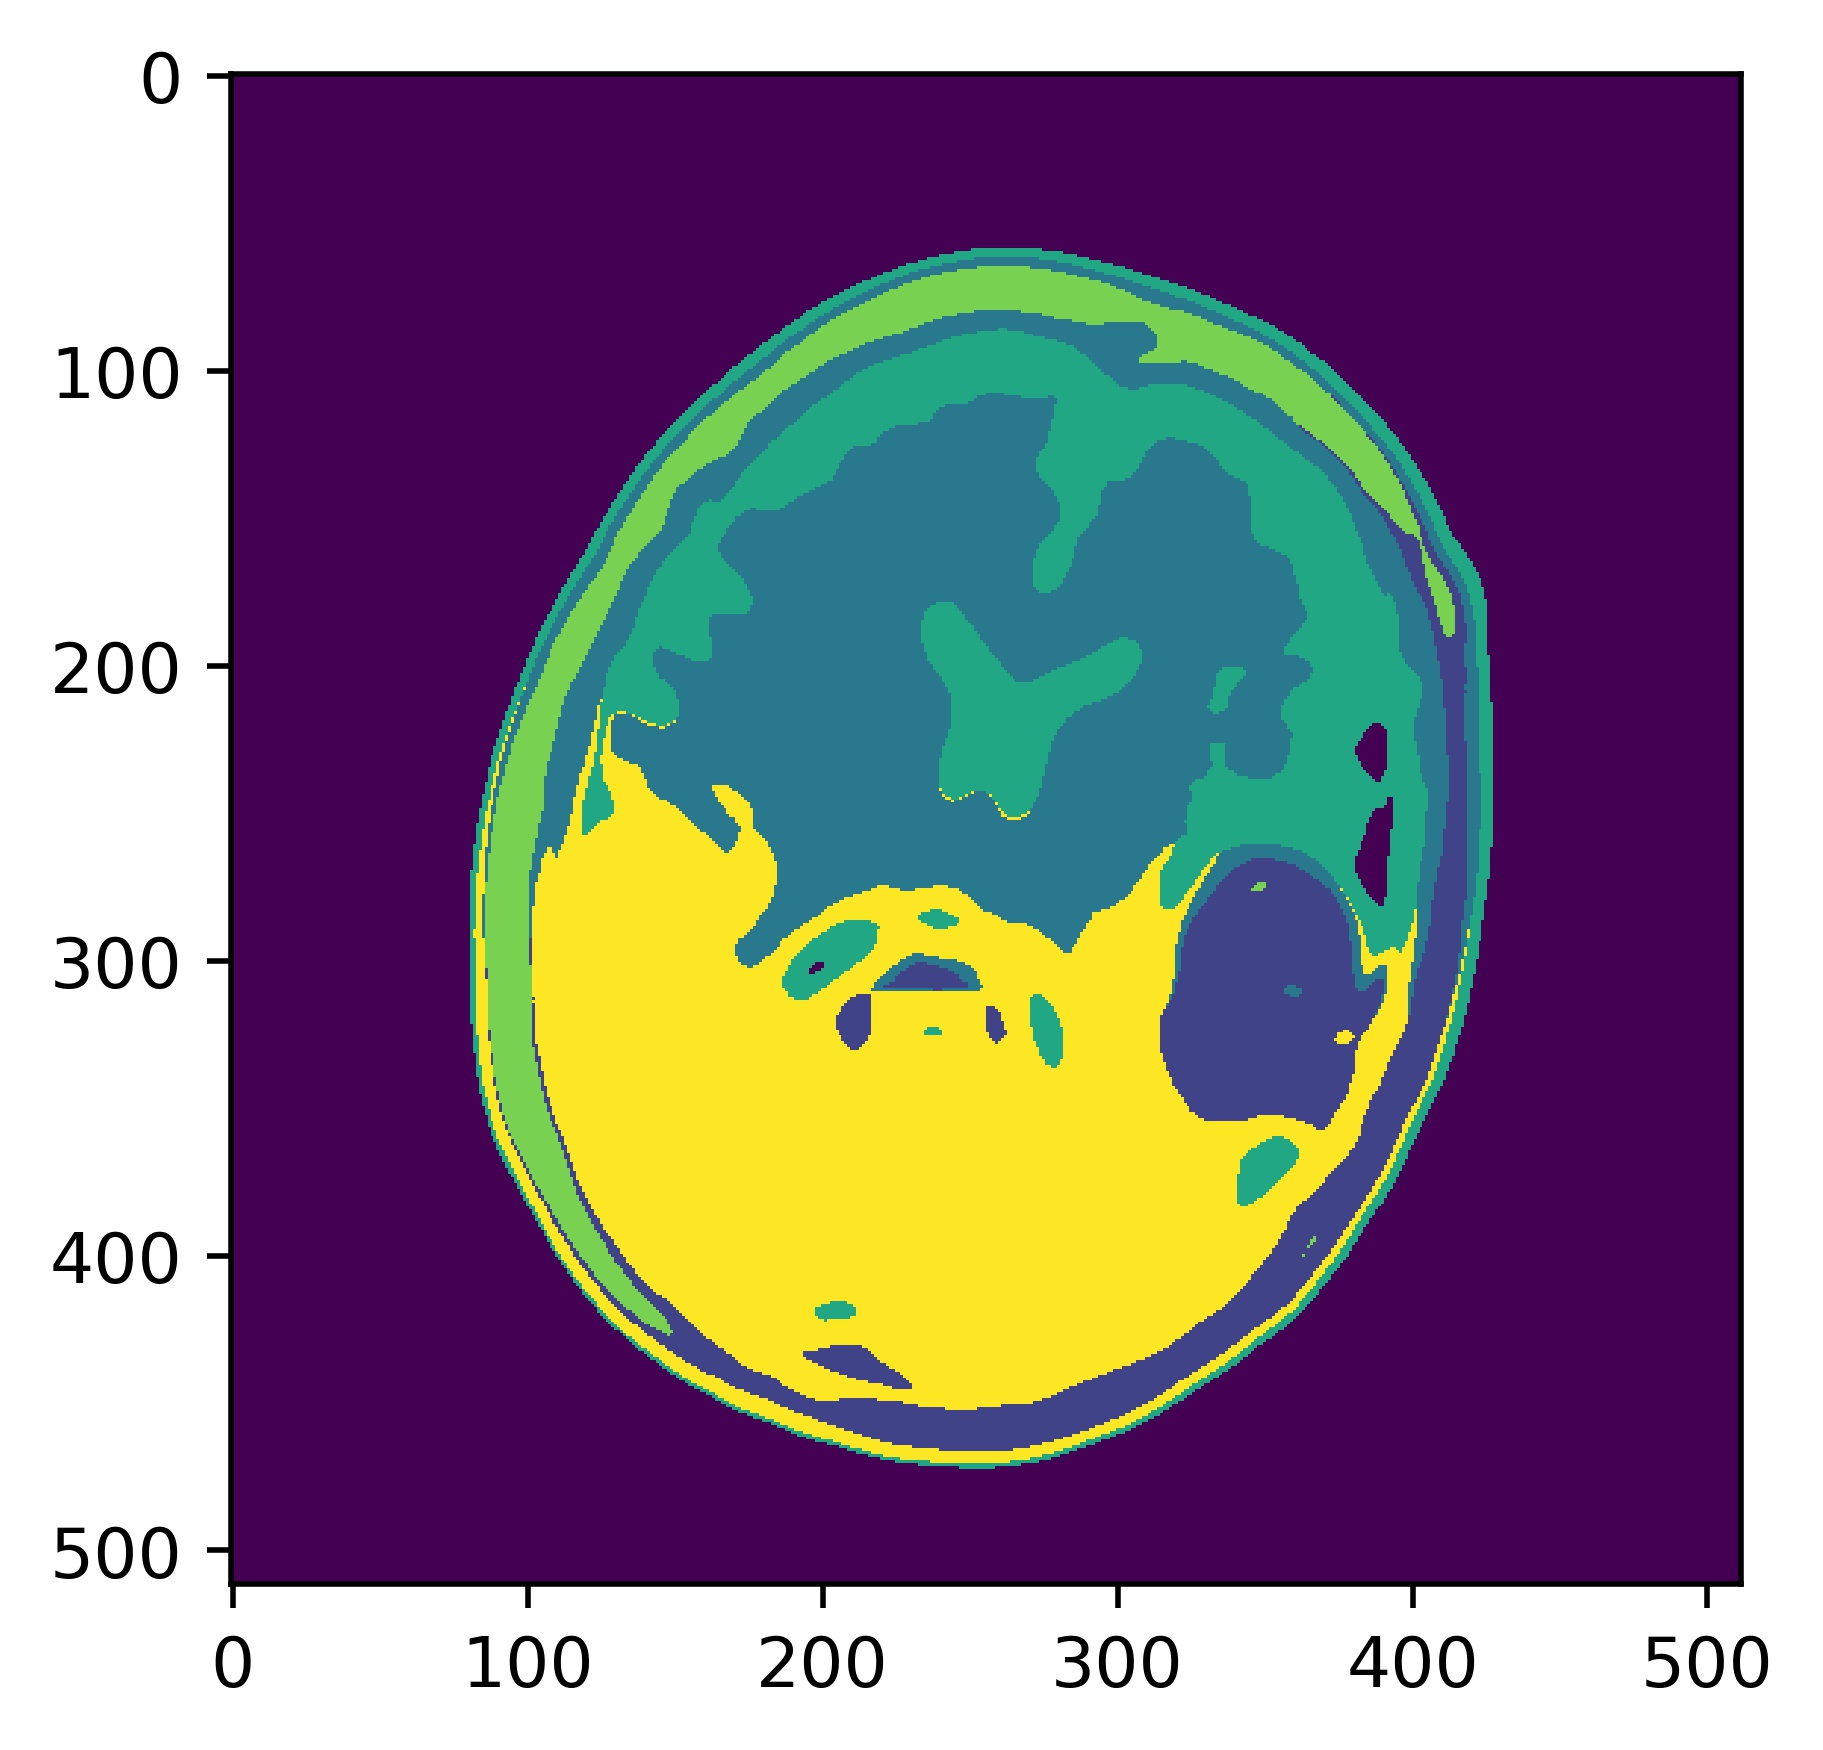

In [5]:
from IPython.display import Image
Image("intermediateSegm0.jpg", width=300, height=300)

__(c) From the result that you obtained above, extract a black and white image (mask) representing only the pixels that have been labelled with the same label as the tumor. __

To do this, consider the following steps

- First find the value of the label associated to the tumor in the image 'labels' returned by K-means. 

- Then find the indices of all the pixels in 'labels' that have the same label
- Finally build the mask by defining a numpy array of zeros and setting all the pixels who have a label equal to the label of the tumor to 1. That should give you a black and white image whose white pixels correspond to the cluster of the tumor. Use the snippet below to display this mask


In [ ]:
# put your code here







plt.imshow(mask1, interpolation='nearest',cmap='gray')
plt.show()






desired result:

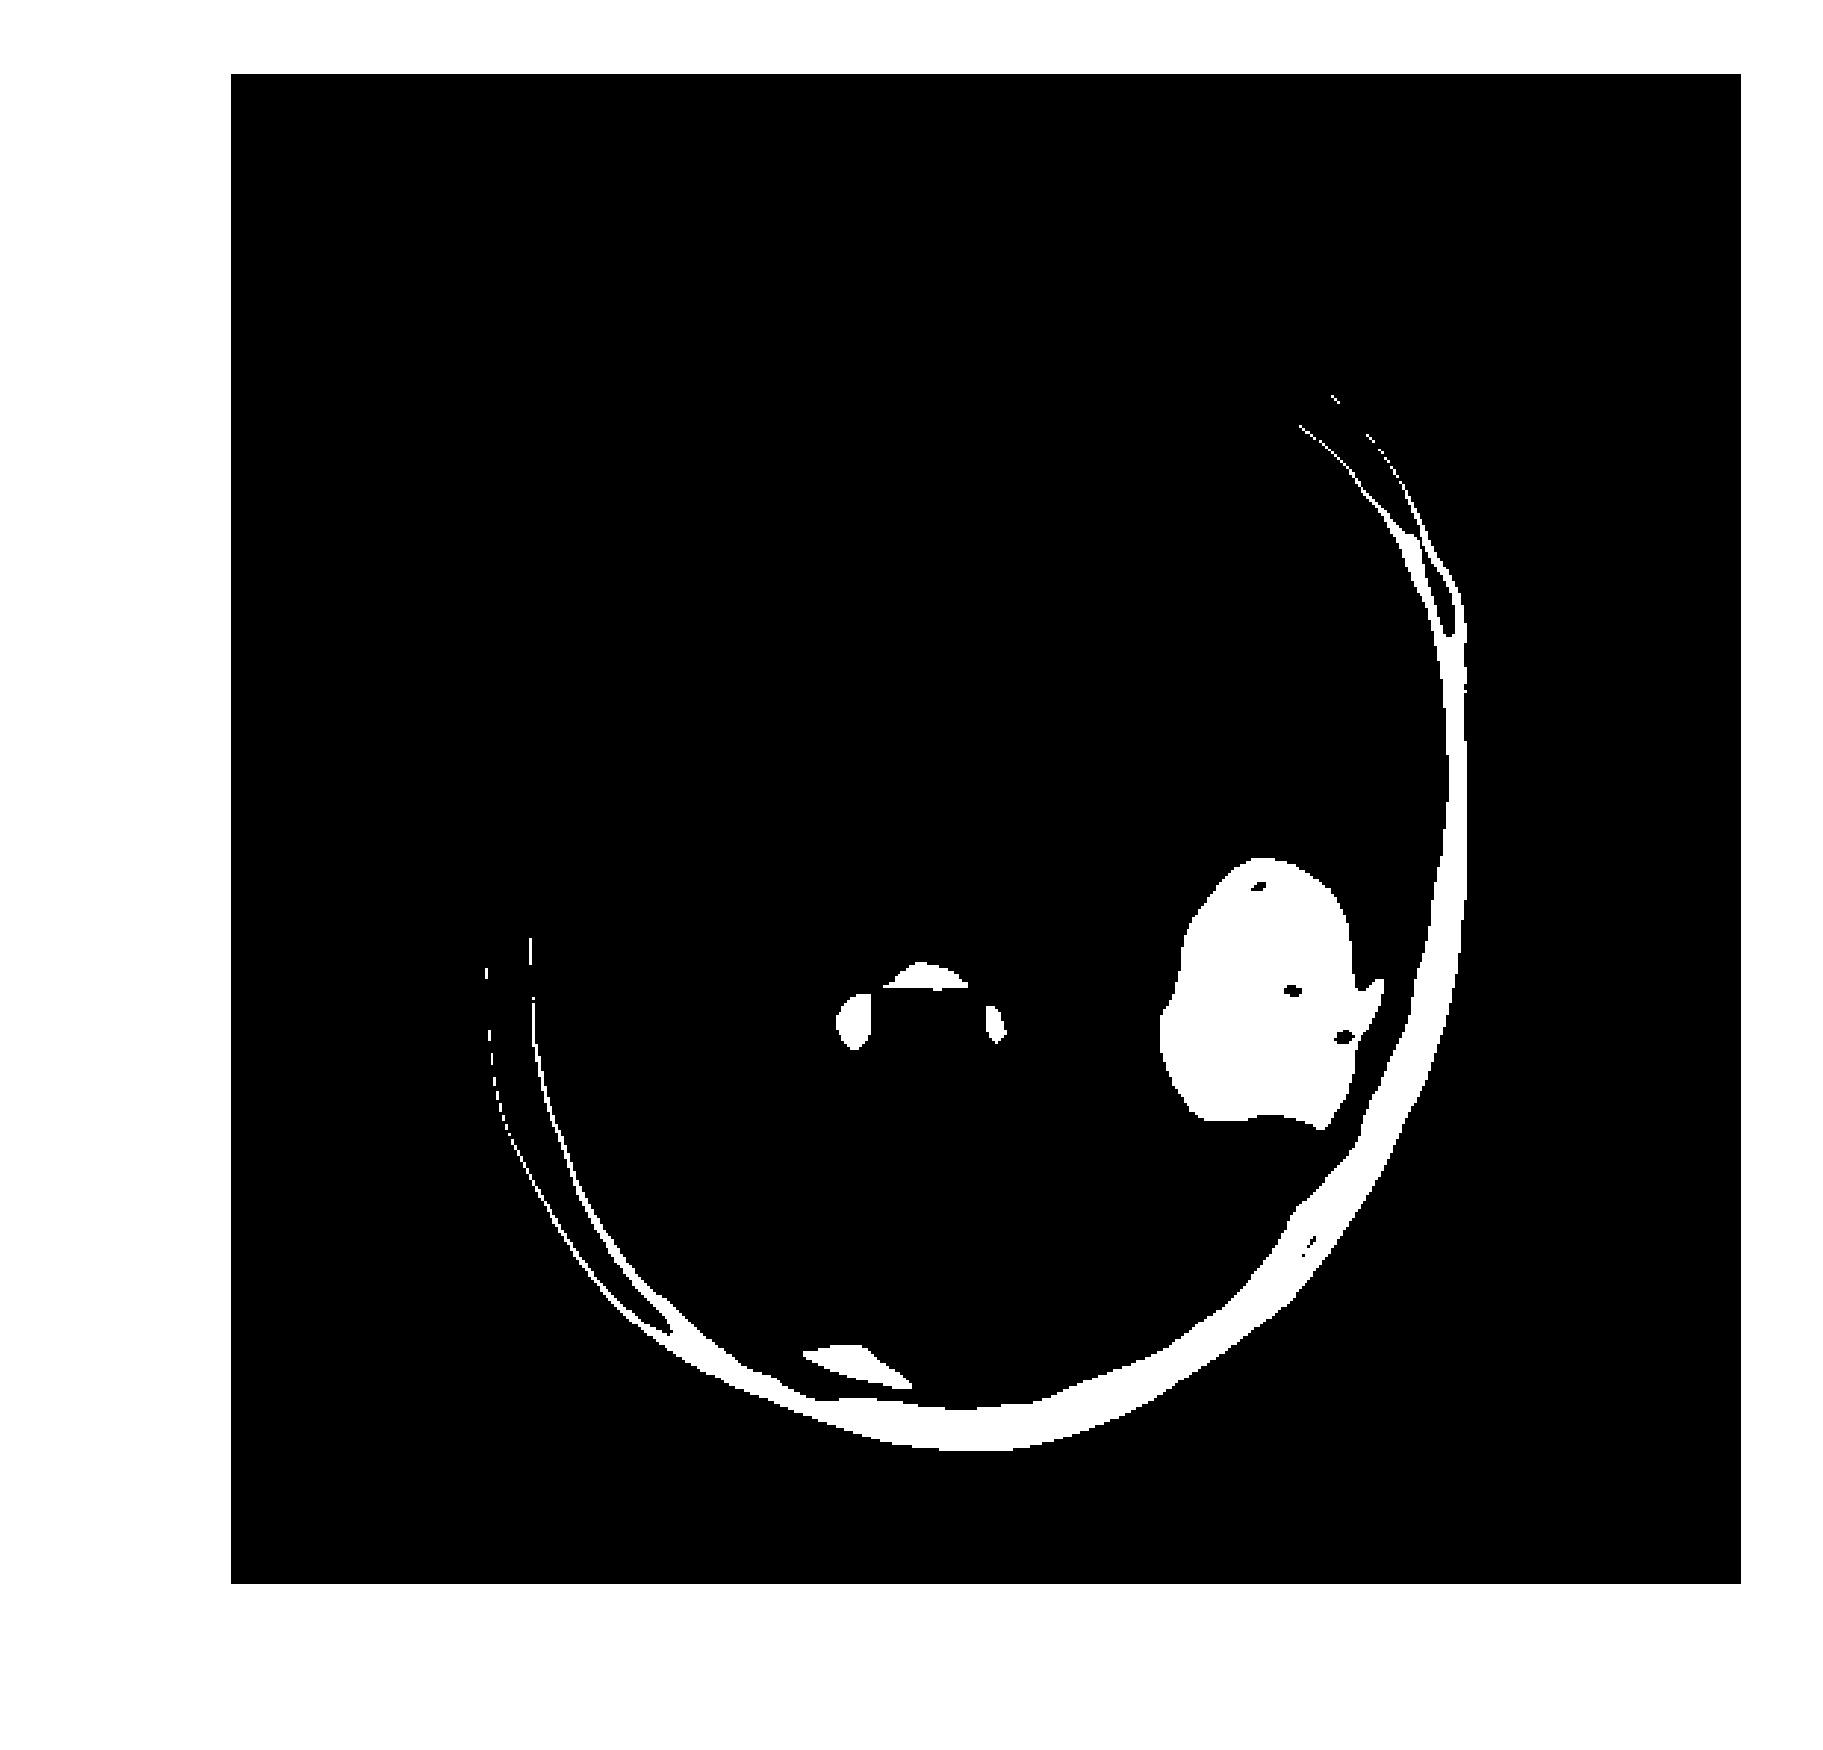

In [6]:
from IPython.display import Image
Image("intermediateSegm1.jpg", width=300, height=300)

Because of similarities in the pixels intensities, part of the cerebrospinal fluid is selected  by Kmeans as belonging to the same component as the tumor. Fortunately, the component corresponding to the tumor is disconnected from the cerebrospinal fluid. We will use this property to get the final contour. 

To get the final contour, we need two more steps. 

1. To return each of the connected components from the binary image, we will use the function 'connectedComponents' from openCV. From those connected components we will then only retain the tumor

2. Finally we will fill in the remaining few black pixels that are not in white inside the tumor using the function 'ndi.binary_fill_holes'

__(d) Using the function 'measure.label' from skimage, extract each of the connected components from your binary mask__. The function should take two arguments: your mask and a second argument, 'background=0' which indicate the value of the background which we disregard. Then build a new mask that only retain the pixels corresponding to the tumor

In [ ]:
import cv2
from skimage import measure

# put your code here



desired result (1):

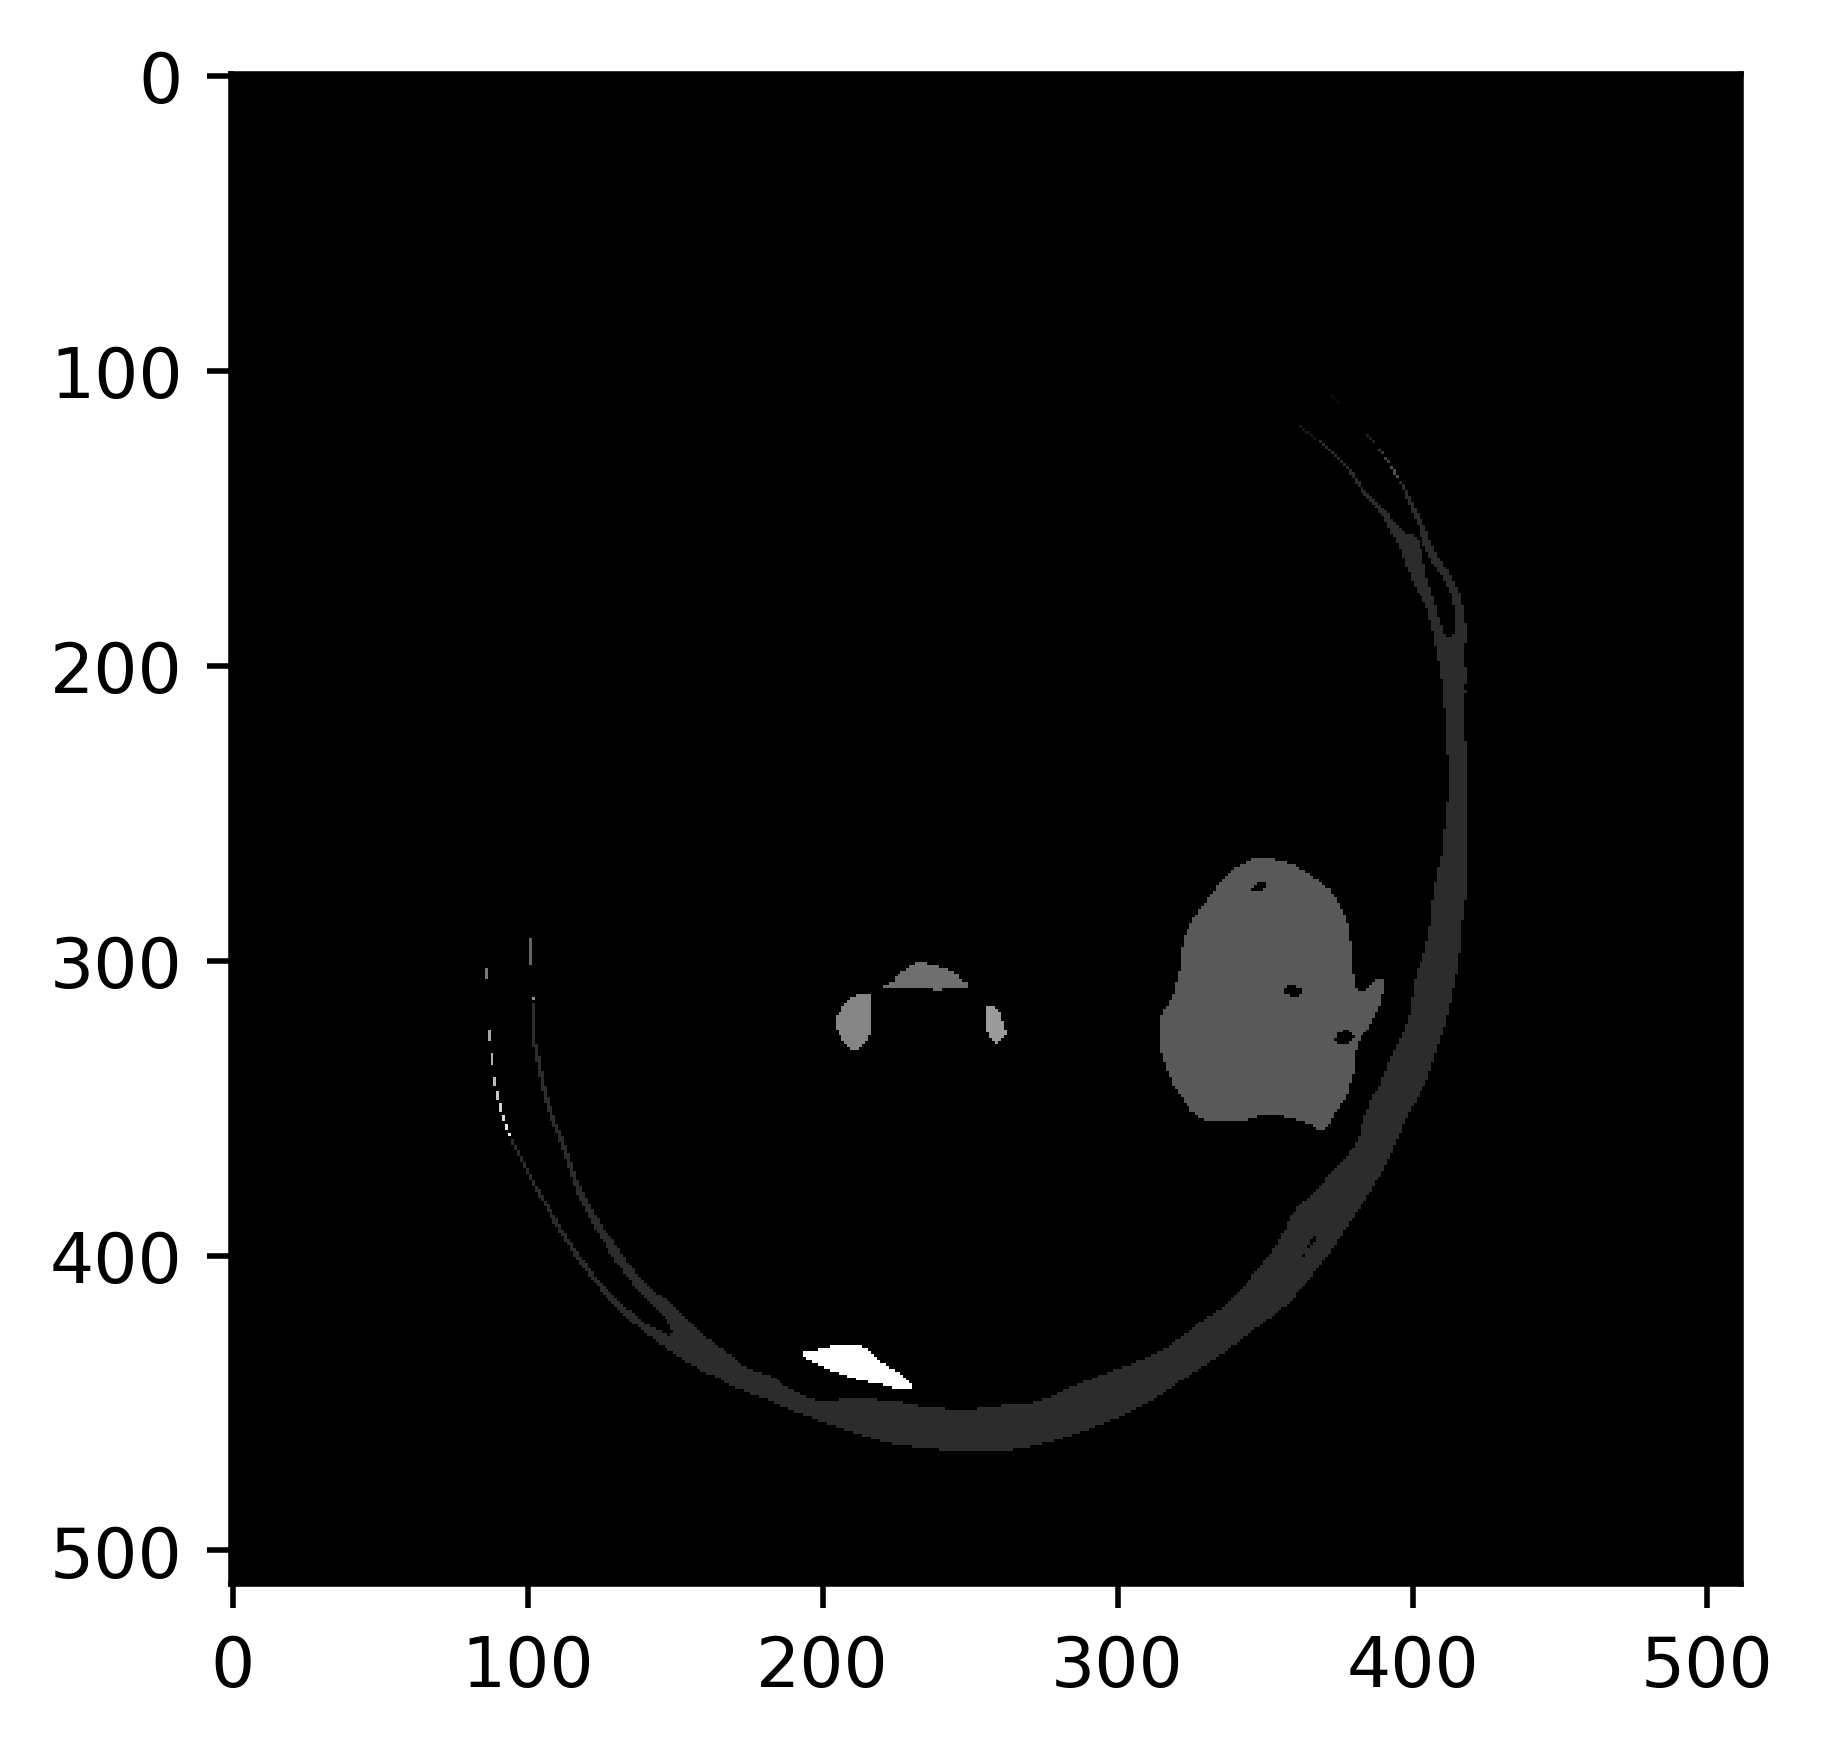

In [9]:
from IPython.display import Image
Image("intermediateSegm2.jpg", width=300, height=300)

desired result (2):

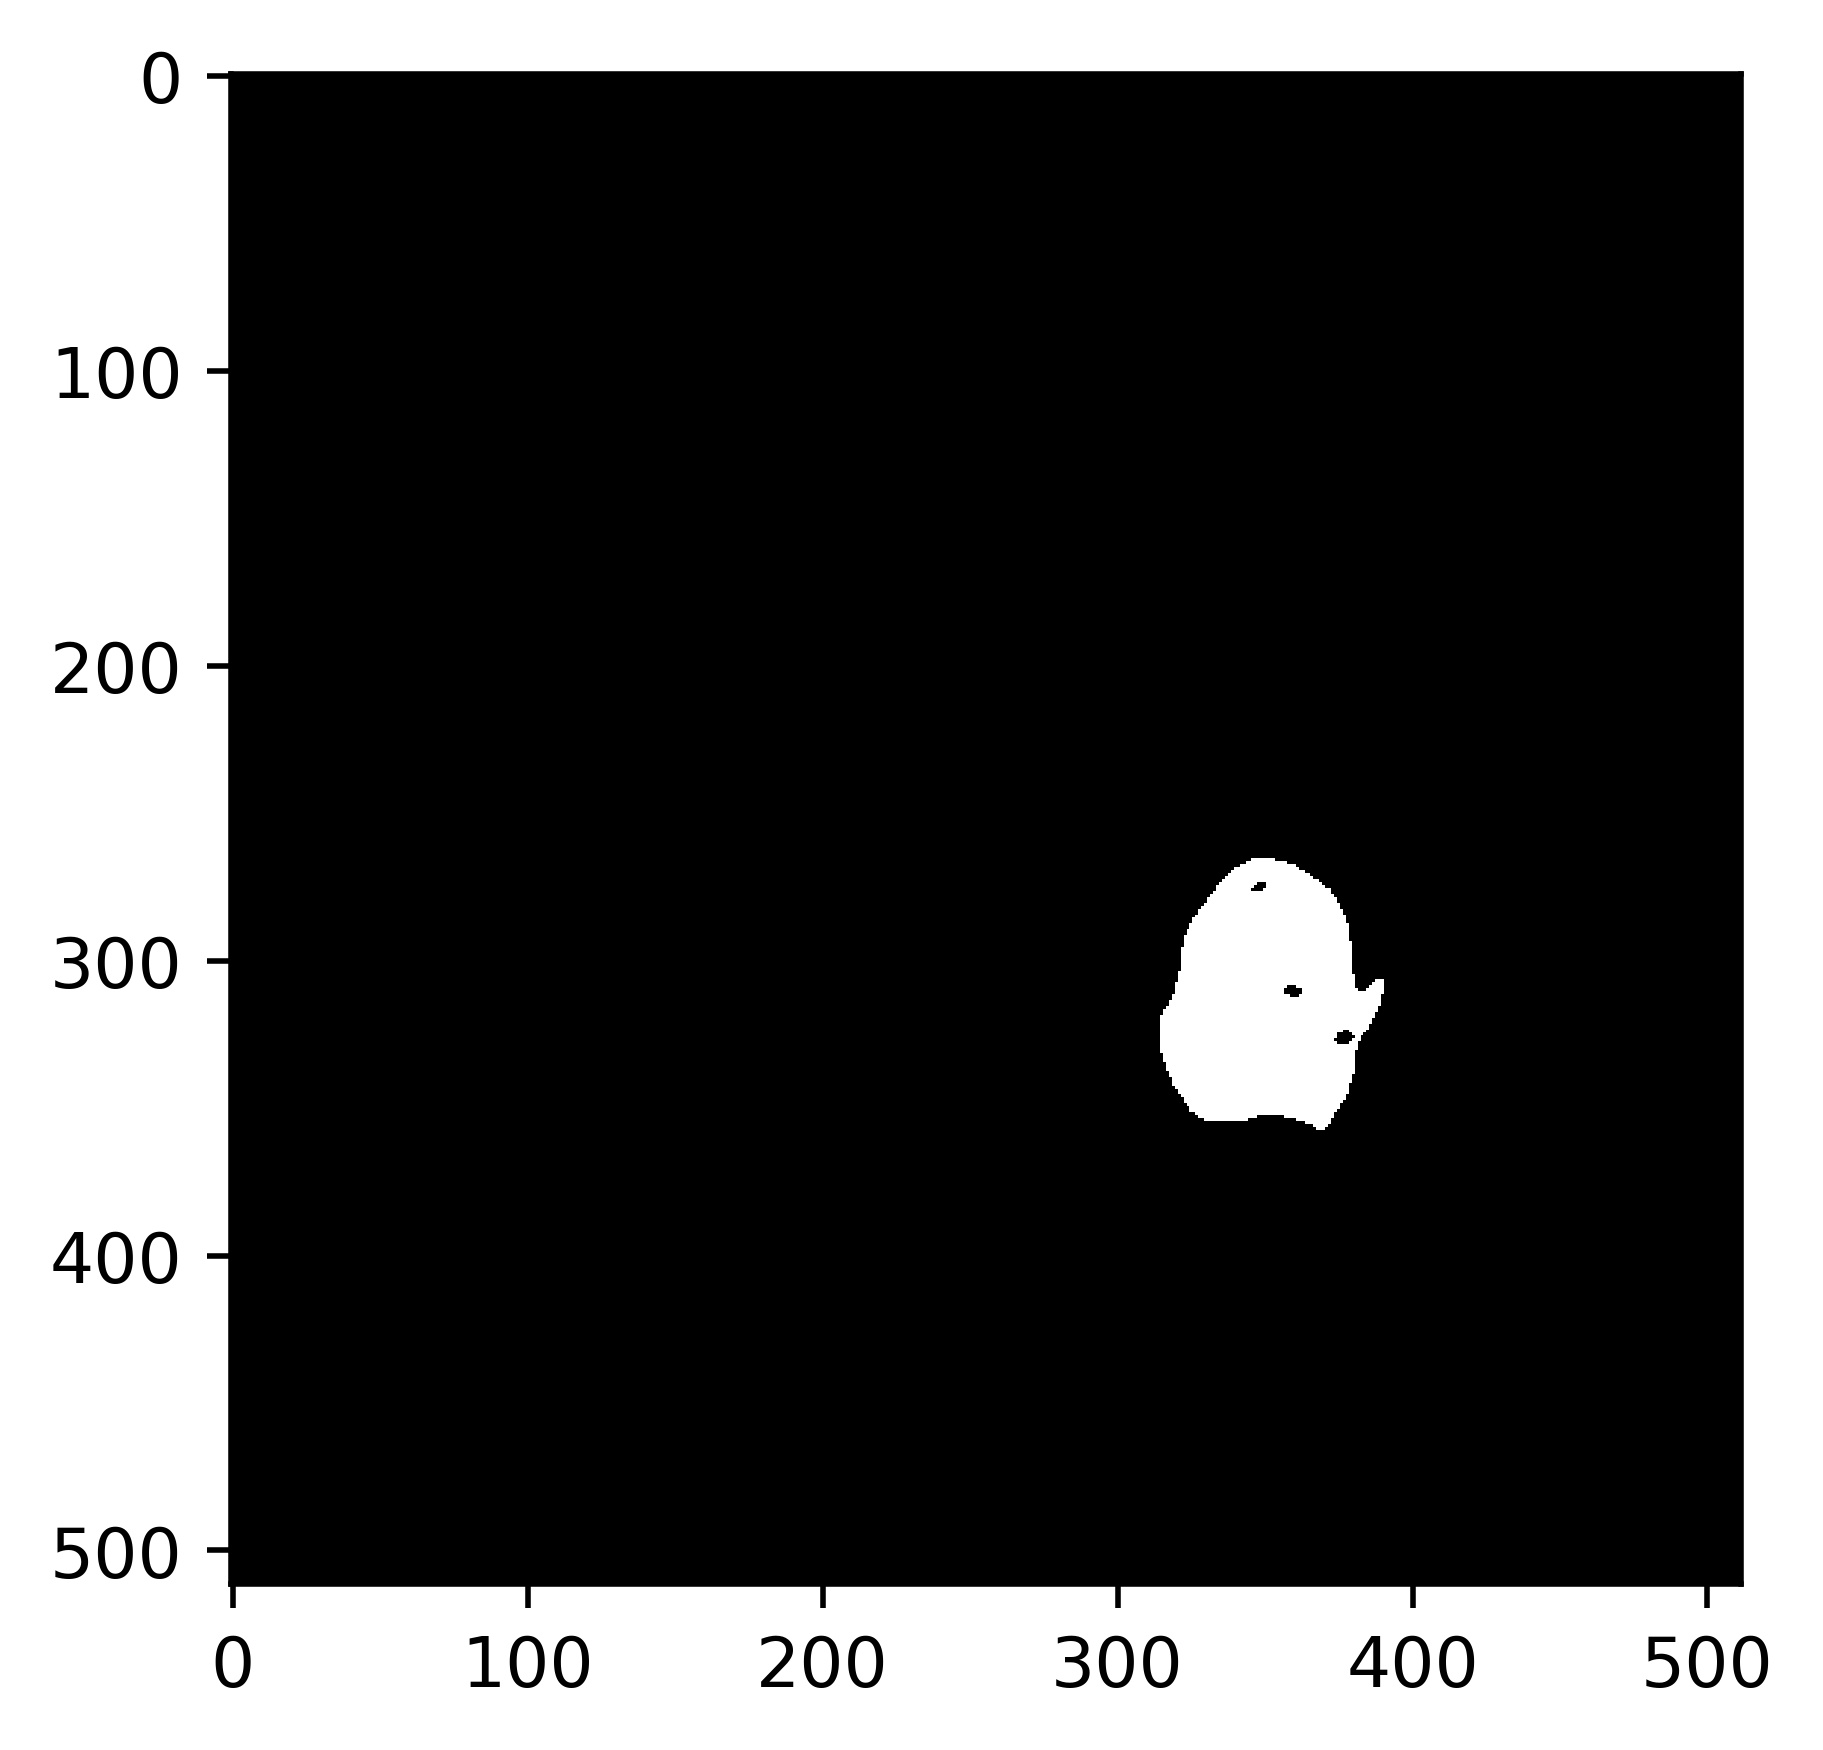

In [10]:
from IPython.display import Image
Image("intermediateSegm3.jpg", width=300, height=300)

__(e) As you can see from the picture above, there are still a couple of black pixels inside the tumor. Use function 'ndi.binary_fill_holes' from scipy which takes as argument your mask from above and gives as output the completely homogeneous mask__.

In [ ]:
from scipy import ndimage as ndi

# put the line here and display the result with the lines below

plt.imshow(filled_maskFinal, interpolation='nearest',cmap='gray')
plt.show()

__(f) Now that you have completed the segmentation and obtained the corresponding mask, we will compare this mask to the contour delineated by the surgeon__. 

One approach to compare binary masks is to rely on the 'Sorensen-Dice' coefficient. For two mask $X$ and $Y$, the coefficient is defined as

$$\alpha = \frac{2|X\cap Y|}{|X|+|Y|}$$

Where $|X|, |Y|$ are the number of non zeros (i.e white) pixels in $X$ and $Y$ and $|X\cap Y|$ is the number in the intersection. 

Compute the Dice coefficient between your mask and the manual segmentation of the physician stored in 'mat_mask'. How good is your segmentation?

In [ ]:
# put your code here



__(g) Use the code below to superimpose your contour on the surgeon's contour (i.e. replace teh variable 'yourContour' with your binary mask)__

In [ ]:

# Find contours at a constant value of 0.8
contour1 = measure.find_contours(mask_surgeon, .5)
contour2 = measure.find_contours(yourContour, .5)
contour1 = contour1[0]
contour2 = contour2[0]


# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(mat_image['X1'], interpolation='nearest', cmap=plt.cm.gray)


ax.plot(contour1[:, 1], contour1[:, 0], linewidth=2)
ax.plot(contour2[:, 1], contour2[:, 0], linewidth=2)

plt.axis('off')
plt.show()



#### 3.2.2. [4pts] Latent variable models 

In this second exercise, we will learn a 2D representation from a 3D dataset, and then cluster the dataset in the 2D space using K-means. Consider the following dataset

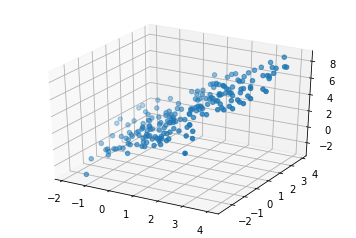

In [128]:
import numpy as np

mean1 = [0, 0]
cov = [[.8, 0], [0, .8]] 

x1, y1 = np.random.multivariate_normal(mean1, cov, 100).T

mean2 = [2,2]
cov = [[.8, 0], [0, .8]] 

x2, y2 = np.random.multivariate_normal(mean2, cov, 100).T


x = np.concatenate((x1,x2),axis=0)
y = np.concatenate((y1,y2), axis=0)


z = x + y +1



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
plt.show()

__(a) We would like to find an optimal 2D representation of this dataset (i.e find an optimal plane on wich we could project the points) in order to recover two clusters hidden in this dataset. According to you, what would this plane look like? __

__(b) Compute the projection of the 3D points onto this optimal plane using scikit-learn. Then, once you have the 2D representation of the points, separate two clusters by applying kmeans to the corresponding points__ (hint: for the projection onto the plane you can almost entirely rely on teh functions of scikit-learn)

In [ ]:
# put your answer here



### 3.3. [4pts] Bonus: Reinforcement 

#### 3.3.1 In this last exercise, we will implement the simple multi-armed bandit algorithm which we studied in class

One of the simplest simplest approach to maximize a reward in reinfrocement learning, is to follow a $\varepsilon$-greedy action selection policy. In this exercise, we consider 3 bandit (i.e. Slot machines) with corresponding levers that can be pulled. You have a given amount of time to make as much money as you can by pulling the levers. 

We consider three slot machine which have respective probabilities of success [0.45, 0.40, 0.80]

At the beginning our agent does not know those probability so the best we can do is follow the $\varepsilon$-greedy approach and try each machine while still follow the one that seems to bring the most money.


Implement the bandit algorithm with a $\varepsilon=.1$

Following what we discussed in class, we will only keep track of the current average value $Q(A)$ of each action (i.e bandit) as well as the number of time, $n(A)$ each action was selected. Recall that we need this number to update the average value of each action as 

$Q[A] \leftarrow Q[A] + (1/N[A])*(R[A] - Q[A])$


write a for or a while loop that last sufficiently long to indicate you the best action (a few seconds is probably enough). In each iteration of the loop 

- Either define your action to be random (a.k.a selecting one machine at random) with probability epsilon
- or select the action that corresponds to the maximum value in Q

Then update Q and N for your action


(hint 1: The reward of an action (i.e pulling the lever of a particular slot machine) can be defined by drawing a random number from a [0,1] uniform distribution. If the number drawn is below the probability of success for the given slot machine, the reward should be set to 1, otherwise you should set it to 0)

(hint 2: same idea for the action selection process, you draw a number from the uniform probability distribution on [0,1], if the number falls below .1, you take a random action, otherwise you take the actiion that corresponds to the max of Q)

(hint 3: to draw a number following the uniform distribution on [0,1] use np.random.rand())


In [ ]:
import numpy as np


# put your code here